In [1]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


# local import
sys.path.append("../../")
from utils.trackmate import dataEngineering as _tm
from utils.trackmate import spatialAnalysis as _stat
from utils.trackmate import woundHealing as _wh

/home/cstansbu/.local/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [16]:
dir_path = '/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/WH01/outputs/'
# dir_path = '/home/cstansbu/Desktop/outputs/'
df_list = []

for f in os.listdir(dir_path):
    if f.endswith(".csv"):
        df = pd.read_csv(f"{dir_path}{f}")
        df_list.append(df)
        
df = pd.concat(df_list, ignore_index=True)

get_channel = lambda x: int(x[2])
get_time = lambda x: int(str(x).split("t:")[1].split("/")[0])
get_experiment =  lambda x: str(x).split("#")[1]
get_file =  lambda x: str(x).split(" - ")[1].split("#")[0].strip()

df['channel'] = df['Slice'].apply(get_channel)
df['frame'] = df['Slice'].apply(get_time)
df['experiment'] = df['Slice'].apply(get_experiment)
df['file'] = df['Slice'].apply(get_file)

di = {
    '01' : 'B2',
    '04' : 'B3',
    '07' : 'B4',
    '10' : 'B5',
    '25' : 'D2',
    '28' : 'D3',
    '31' : 'D4',
    '34' : 'D5',
    '37' : 'E5', # note that E goes in reverse order
    '40' : 'E4',
    '43' : 'E3',
    '46' : 'E2',
}

df['Scene'] = df['experiment'].map(di)

di = {
    'B2': 'FBS',
    'B3': 'FBS',
    'B4': 'FBS',
    'B5': 'FBS',
    'D2': 'HS',
    'D3': 'HS',
    'D4': 'HS',
    'D5': 'HS',
    'E2': 'SS',
    'E3': 'SS',
    'E4': 'SS',
    'E5': 'SS',
}

df['Serum'] = df['Scene'].map(di)

di = {
    'B2': 8500,
    'B3': 4200,
    'B4': 2100,
    'B5': 1000,
    'D2': 8500,
    'D3': 4200,
    'D4': 2100,
    'D5': 1000,
    'E2': 8500,
    'E3': 4200,
    'E4': 2100,
    'E5': 1000,
}

df['Plating Density'] = df['Scene'].map(di)
df.head()

,Slice,Count,Total Area,Average Size,%Area,Mean,channel,frame,experiment,file,Scene,Serum,Plating Density
0,c:3/4 t:1/54 - WH-01-2019-09-09.czi #25,40,7711.003,192.775,0.095,255.0,3,1,25,WH-01-2019-09-09.czi,D2,HS,8500
1,c:3/4 t:2/54 - WH-01-2019-09-09.czi #25,30,5983.308,199.444,0.074,255.0,3,2,25,WH-01-2019-09-09.czi,D2,HS,8500
2,c:3/4 t:3/54 - WH-01-2019-09-09.czi #25,37,7490.664,202.450,0.092,255.0,3,3,25,WH-01-2019-09-09.czi,D2,HS,8500
3,c:3/4 t:4/54 - WH-01-2019-09-09.czi #25,44,8947.633,203.355,0.110,255.0,3,4,25,WH-01-2019-09-09.czi,D2,HS,8500
4,c:3/4 t:5/54 - WH-01-2019-09-09.czi #25,37,7740.894,209.213,0.095,255.0,3,5,25,WH-01-2019-09-09.czi,D2,HS,8500


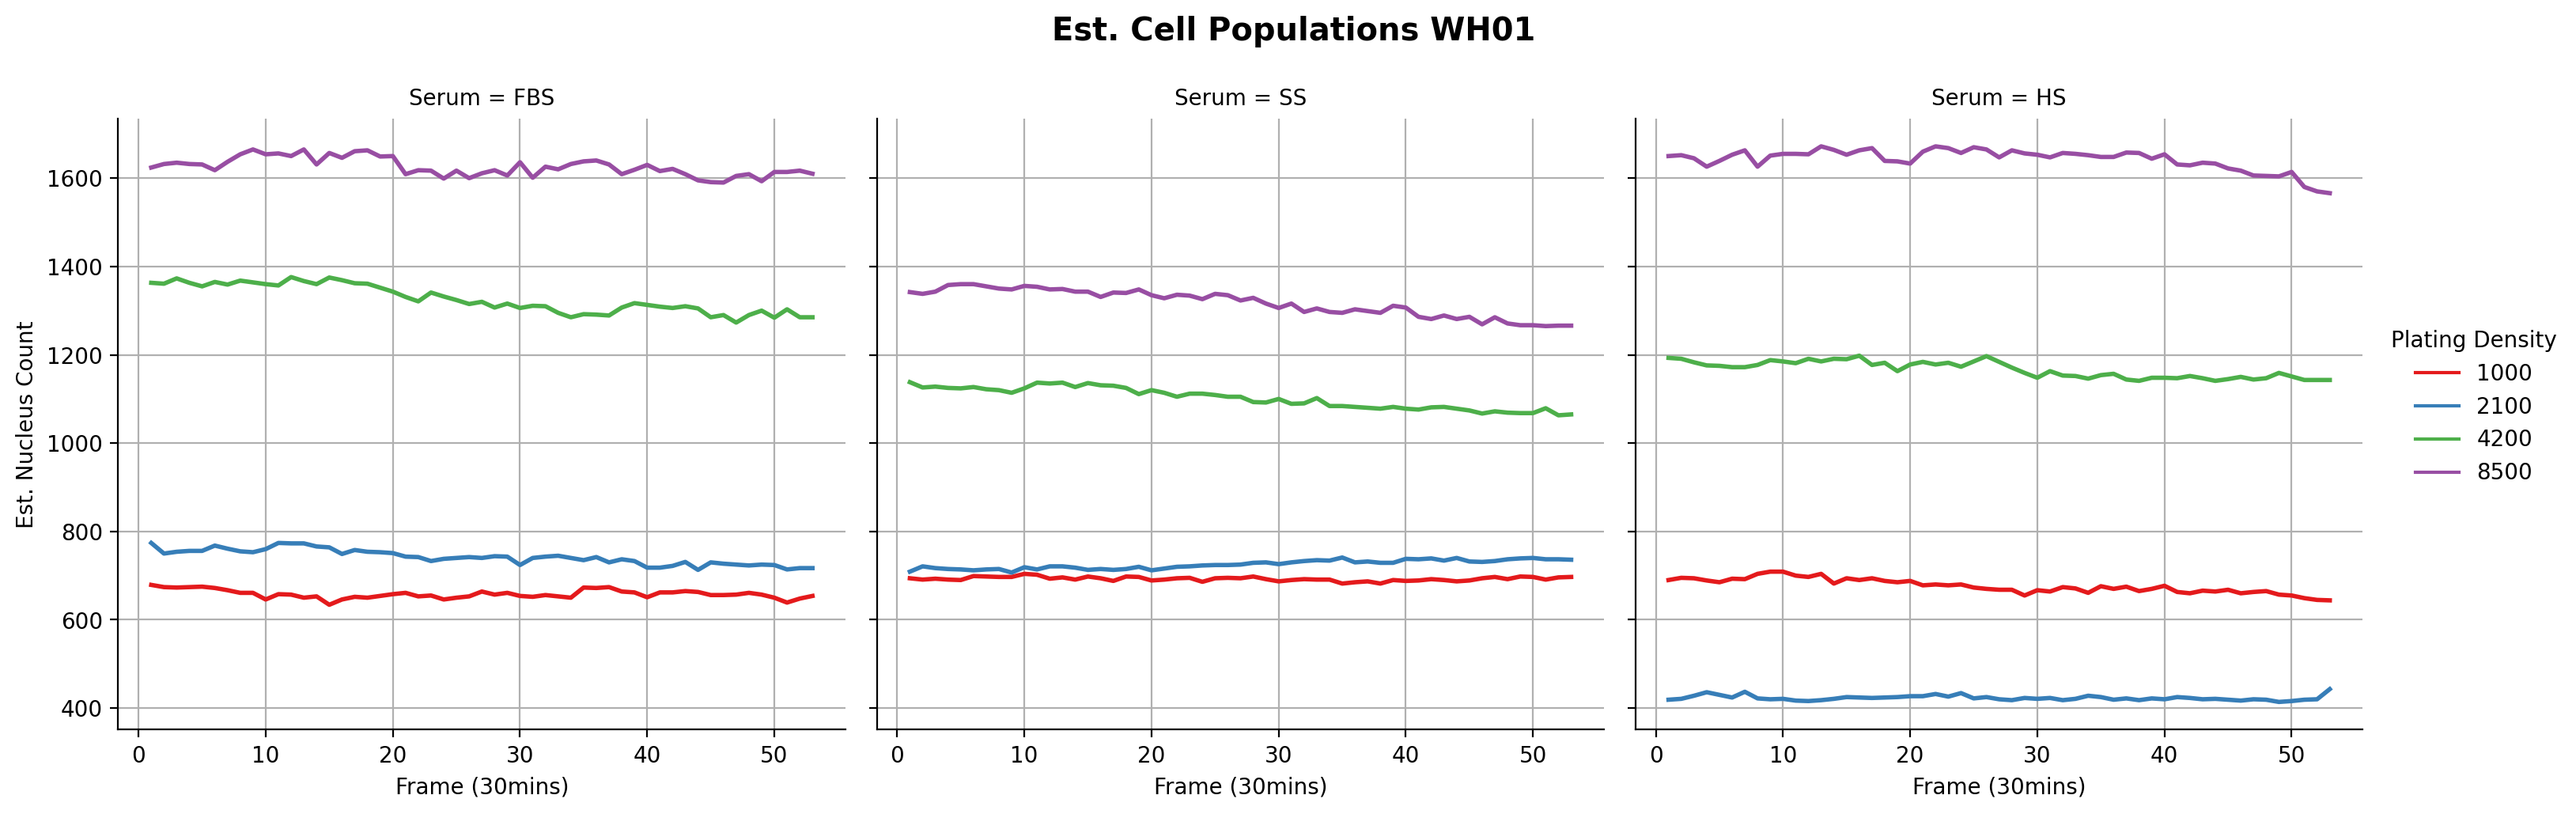

In [17]:
tmp = df[(df['channel'] == 4) & (df['frame'] < df['frame'].max())]

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (8, 2)
matplotlib.rcParams['axes.grid'] = True

p = sns.relplot(data=tmp,
             x='frame', 
             y='Count',
             kind="line",
             hue='Plating Density',
             palette='Set1',
             col='Serum',
             lw=2)

p.fig.suptitle("Est. Cell Populations WH01" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
p.fig.subplots_adjust( top = 0.85 )
  
# Set x-axis and y-axis labels
p.set_axis_labels( "Frame (30mins)" , "Est. Nucleus Count" )

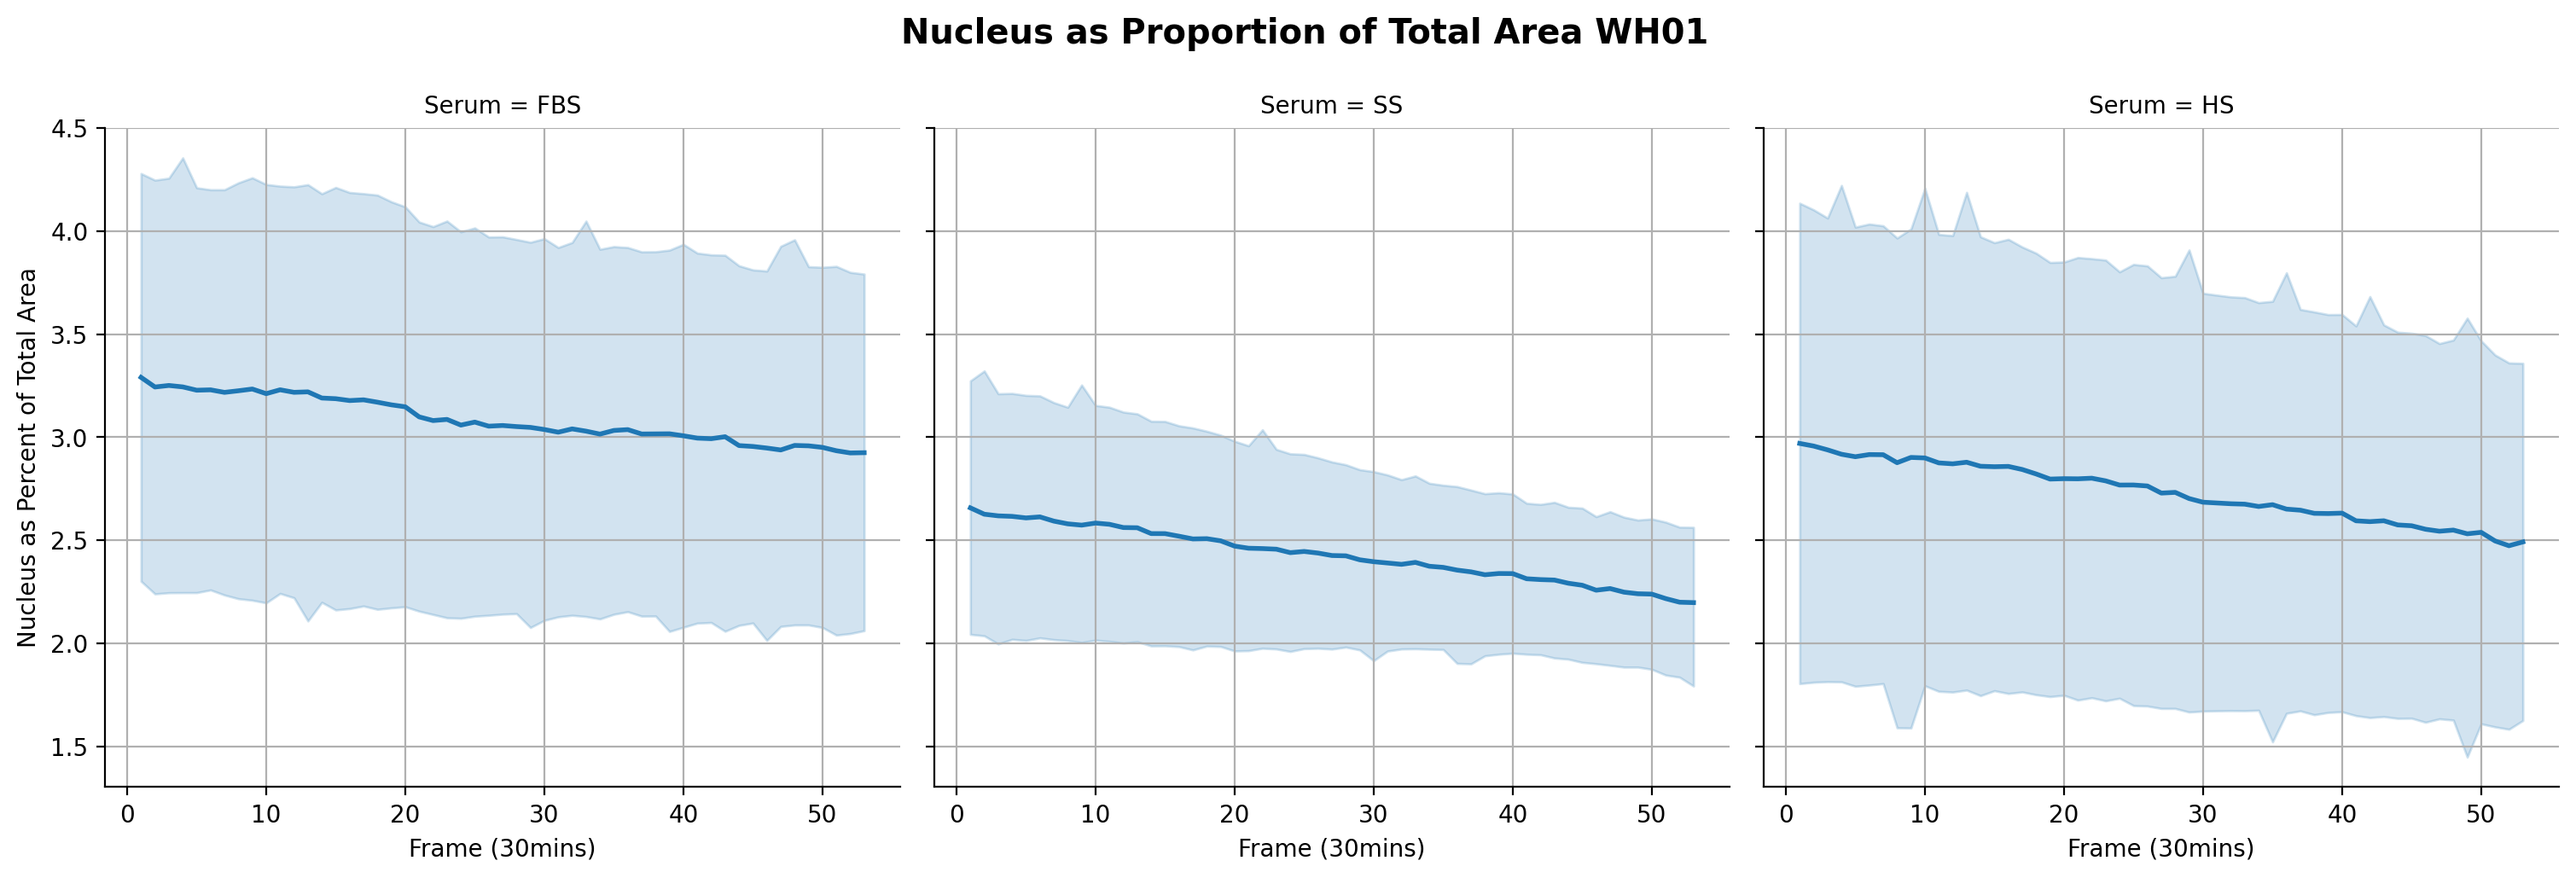

In [18]:
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (8, 2)
matplotlib.rcParams['axes.grid'] = True

p = sns.relplot(data=tmp,
             x='frame', 
             y='%Area',
             kind="line",
             palette='Set1',
             col='Serum',
             lw=2)

p.fig.suptitle("Nucleus as Proportion of Total Area WH01" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
p.fig.subplots_adjust( top = 0.85 )
  
# Set x-axis and y-axis labels
p.set_axis_labels( "Frame (30mins)" , "Nucleus as Percent of Total Area" )

/home/cstansbu/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Text(0.5, 0.98, 'Distribution of Population Deltas by Serum')

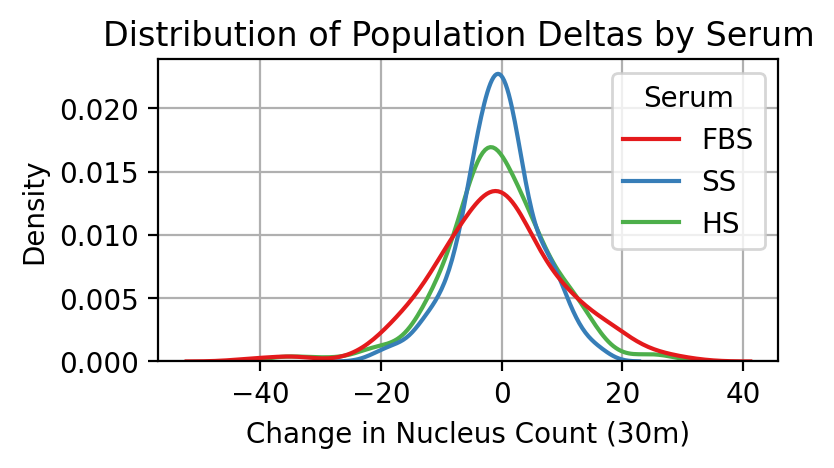

In [19]:
tmp['count_delta'] = tmp['Count'].diff()
tmp['count_delta'] = np.where(tmp['frame'] == 1, np.nan, tmp['count_delta'])


matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 2)
matplotlib.rcParams['axes.grid'] = True
sns.kdeplot(data=tmp, 
            x='count_delta',
            hue='Serum', 
            palette='Set1')

plt.ylabel("Density")
plt.xlabel("Change in Nucleus Count (30m)")
plt.suptitle("Distribution of Population Deltas by Serum")

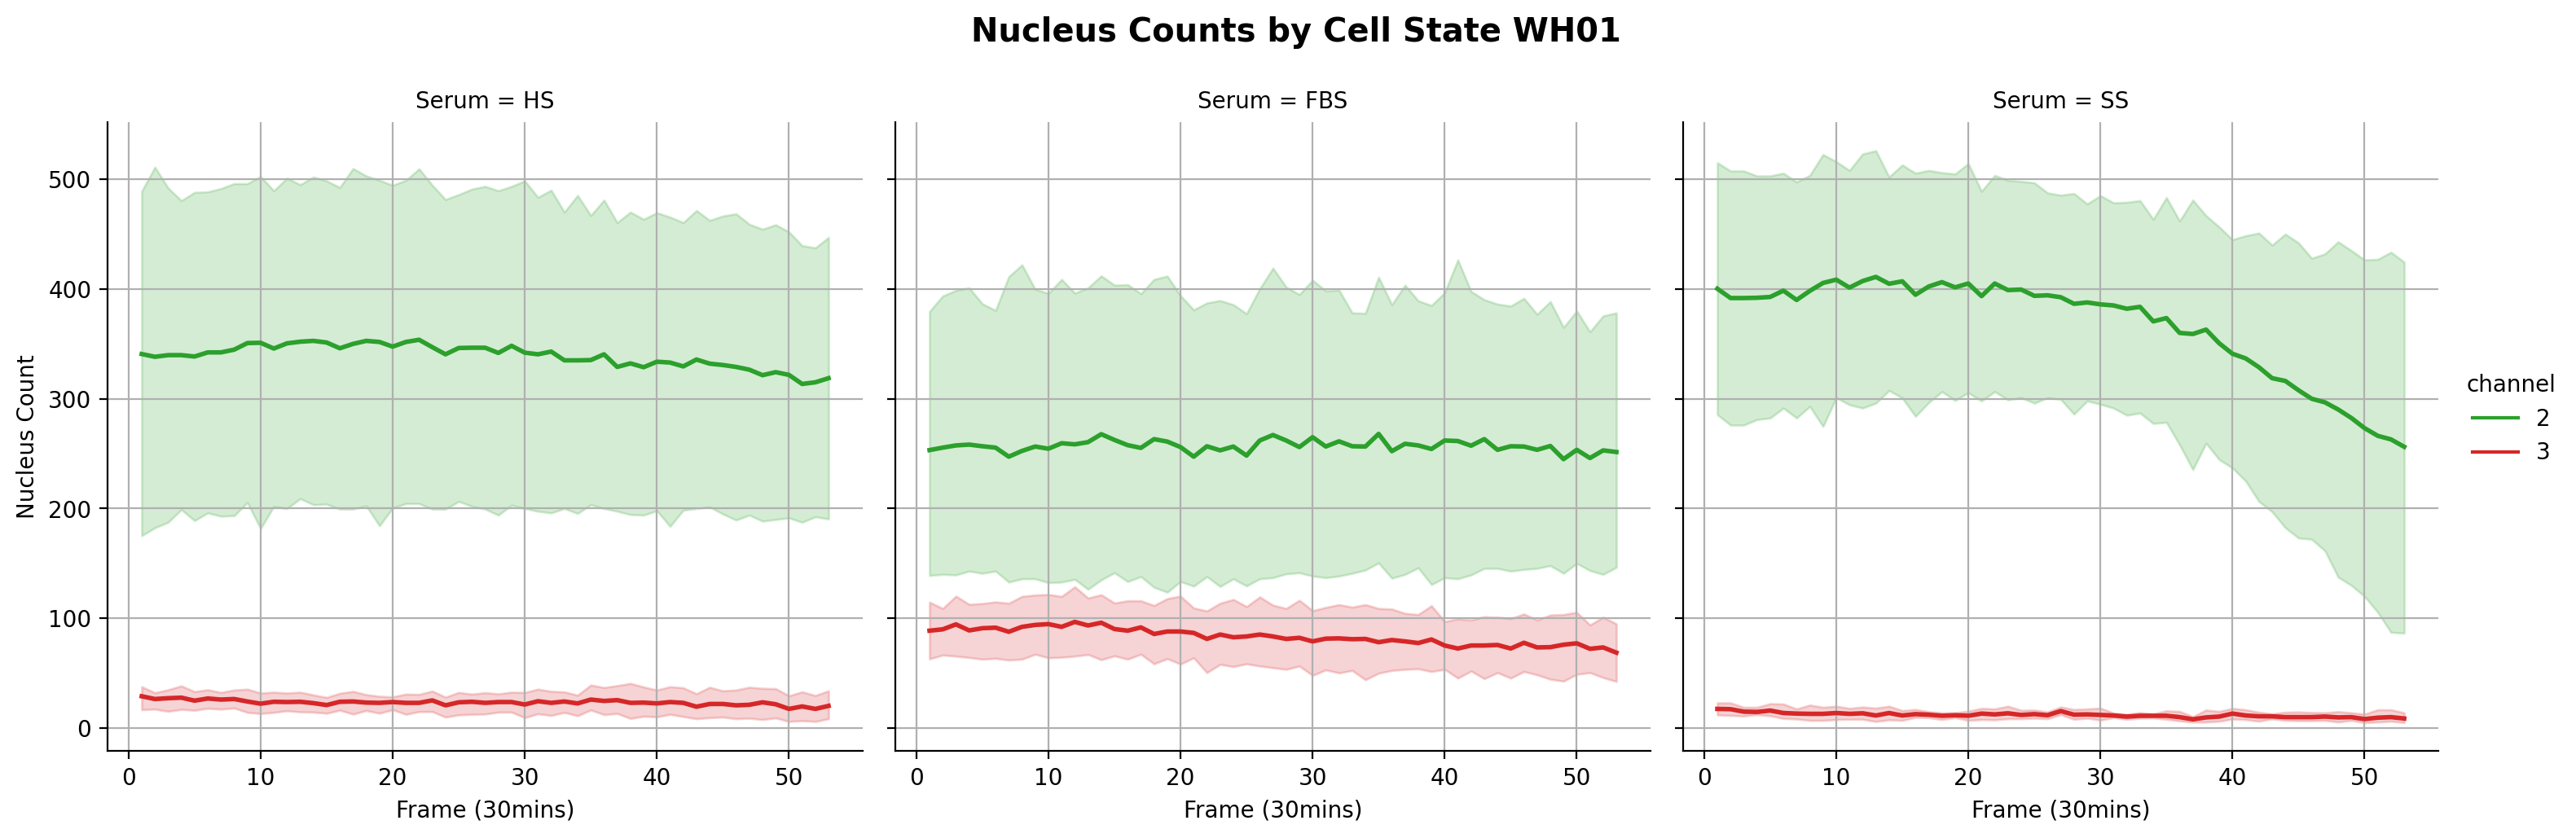

In [25]:
tmp = df[(df['frame'] < df['frame'].max()) & (~df['channel'].isin([1, 4]))]

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (8, 2)
matplotlib.rcParams['axes.grid'] = True

p = sns.relplot(data=tmp,
             x='frame', 
             y='Count',
             kind="line",
             hue='channel',
             palette=['C2', 'C3'],
             col='Serum',
             lw=2)


p.fig.suptitle("Nucleus Counts by Cell State WH01" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
p.fig.subplots_adjust( top = 0.85 )
  
# Set x-axis and y-axis labels
p.set_axis_labels( "Frame (30mins)" , "Nucleus Count" )

In [7]:
raise ValueError

ValueError: 

In [ ]:
"""PF analysis (B3)"""

"""Load the tracks"""

DATA_PATH = '/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/WH01/trackmate/B2/'

LOW_INTENSITY_THRESHOLD = 0.1

data = _tm.load_trackmate_dir(DATA_PATH)
df = _tm.merge_tracks_and_all(data)
df = _tm.clean_up_trackSpots(df, LOW_INTENSITY_THRESHOLD)
print(df.shape)

In [ ]:
df.columns

In [ ]:
"""digitize the color intensities
"""

color_chans = ['MEAN_INTENSITY01', 
               'MEAN_INTENSITY02', 
               'MEAN_INTENSITY03', 
               'MEAN_TRACK_INTENSITY01',
               'MEAN_TRACK_INTENSITY02',
               'MEAN_TRACK_INTENSITY03',]

# for col in color_chans:
#     df[col] =  np.where(df[col] > 0, 1, 0)
#     print(col, df[col].value_counts())
#     print()


# discard any cells that have no PF signal
print(df.shape)

tmp = df[['TRACK_ID', 'MEAN_TRACK_INTENSITY01', 'MEAN_TRACK_INTENSITY02']].drop_duplicates()

tmp = tmp[(tmp['MEAN_TRACK_INTENSITY01'] > 0) & (tmp['MEAN_TRACK_INTENSITY02'] > 0)]
df = df[df['TRACK_ID'].isin(tmp['TRACK_ID'])]

print(df.shape)

In [ ]:
rand_track = np.random.choice(df['TRACK_ID'], 1)[0]
tmp = df[df['TRACK_ID'] == rand_track]


sns.lineplot(data=tmp,
             x='FRAME', 
             y='MEAN_INTENSITY01_SCALED',
             color='r')


sns.lineplot(data=tmp,
             x='FRAME', 
             y='MEAN_INTENSITY02_SCALED',
             color='C2')

In [ ]:

def get_state(row):
    red = row[0]
    green = row[1]
    
    if red == green:
        return 'G2/M'
    elif red > green:
        return 'G1'
    else:
        return 'S'


df['STATE'] = df[['MEAN_INTENSITY01', 'MEAN_INTENSITY02']].apply(get_state,  axis=1)

rand_track = np.random.choice(df['TRACK_ID'], 1)[0]
tmp = df[df['TRACK_ID'] == rand_track]

matplotlib.rcParams['figure.figsize'] = (5, 5)

red_y_line = [.1] * len(tmp)
plt.scatter(tmp['STEP'], 
            red_y_line, 
            c='r', 
            edgecolor='k',
            s = 80,
            alpha=tmp['MEAN_INTENSITY01_SCALED'])

green_y_line = [.2] * len(tmp)
plt.scatter(tmp['STEP'], 
            green_y_line, 
            c='g', 
            edgecolor='k',
            s = 80,
            alpha=tmp['MEAN_INTENSITY02_SCALED'])

